# Question 1: %timeit

In [188]:
import numpy as np
%timeit np.zeros((100,100))  # provide statistics on how long it takes to generate a 100x100 array of 0s

2.86 µs ± 20.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [231]:
# Time two random matrix using matul
Rand1=np.random.randn(100,100)
Rand2=np.random.randn(100,100)
%timeit np.matmul(Rand1,Rand2)
buildin=np.matmul(Rand1,Rand2)
print(buildin)

46.2 µs ± 3.14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
[[ 11.65189272  -8.85091592  -6.74411425 ...   5.40834664   4.80729428
    3.10207211]
 [  3.31367141  -2.1383483    3.95610338 ...  -0.72964437   3.0919788
  -14.64373957]
 [-17.09032073   5.21719823   1.08413923 ... -12.65695442  -9.2745322
   -0.41147284]
 ...
 [ 11.46785761 -13.77989415  -1.85983512 ...   3.01069602  -4.64691766
    0.6780557 ]
 [-19.61073088   0.85733819  -3.52278932 ... -11.76648265   1.9983653
    3.08118801]
 [  0.97161494   0.37636532  -2.96384623 ... -10.61323074   0.6080299
  -12.81746634]]


In [234]:
# Time two random matrix 
def matrix_mul(mat1, mat2):
    result=np.zeros((len(mat1),len(mat2[0])))  
    for i in range(len(mat1)): #rows of mat1
       for j in range(len(mat2[0])):      #columns of mat2
           for k in range(len(mat2)):    # rows of mat2
                result[i][j] += mat1[i][k] * mat2[k][j]
    return result

%timeit matrix_mul(Rand1,Rand2)
nested=matrix_mul(Rand1,Rand2)
print(nested)

1.27 s ± 95.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
[[ 11.65189272  -8.85091592  -6.74411425 ...   5.40834664   4.80729428
    3.10207211]
 [  3.31367141  -2.1383483    3.95610338 ...  -0.72964437   3.0919788
  -14.64373957]
 [-17.09032073   5.21719823   1.08413923 ... -12.65695442  -9.2745322
   -0.41147284]
 ...
 [ 11.46785761 -13.77989415  -1.85983512 ...   3.01069602  -4.64691766
    0.6780557 ]
 [-19.61073088   0.85733819  -3.52278932 ... -11.76648265   1.9983653
    3.08118801]
 [  0.97161494   0.37636532  -2.96384623 ... -10.61323074   0.6080299
  -12.81746634]]


after comparison, the two results are the same. The time comsumed by the np.matmul function is 46.2 µs per loop, while the time consumed by the nested loop matrix multiplication is around 1.27s per loop. So the build in function is (1.27s/46.2e-6s=27489) times faster than the nested loop.

# Question 1b

In [236]:

from scipy.signal import convolve
num=[100,500,1000,2000]
for i in num:
    n1=np.random.randn(1,i)  
    n2=np.random.randn(1,i)
    print('when signal length is '+str(i))
    print('direct method:')
    %timeit convolve(n1,n2,method='direct')
    print('fft method:')
    %timeit convolve(n1,n2,method='fft')

when signal length is 100
direct method:


C:\Users\limuc\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()
C:\Users\limuc\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:251: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  in1zpadded[sc] = in1.copy()


322 µs ± 32.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
fft method:
171 µs ± 1.72 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
when signal length is 500
direct method:
6.99 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
fft method:
249 µs ± 4.16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
when signal length is 1000
direct method:
28.5 ms ± 1.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
fft method:
383 µs ± 52.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
when signal length is 2000
direct method:
115 ms ± 5.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
fft method:
522 µs ± 47.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


when n=100, direct method uses 332us, fft uses 171us
when n=500, direct method uses 6.99ms, fft uses 249us
when n=1000, direct method uses 28.5ms, fft uses 383 us
when n=2000, direct method uses 115ms, fft uses 522us
 
When the signal length is small, these two methods are comparable, but then signal length gets bigger and bigger, the time cosumed by direct method increase significantly while that by fft method only increased slightly. So overall, FFT method has a better performance than direct method in terms of calculation speed.

# Question 2: The convolution theorem 

Text(0.5, 1.0, 'Gaussian Kernel')

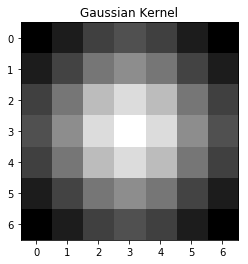

In [183]:
# STEP 1: generate a kernel
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
x=np.zeros((7, 7))
x[3, 3] = 1
Gkernel = ndi.filters.gaussian_filter(x, sigma=2)
plt.imshow(Gkernel, interpolation='none',cmap='gray')   #gaussian kernel
plt.title('Gaussian Kernel')

(128, 128)


Text(0.5, 1.0, 'Original Image')

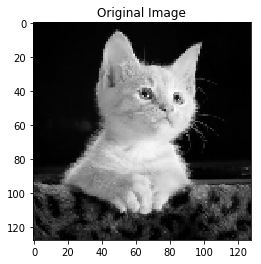

In [152]:
# STEP 2: load a image
from skimage import color
from skimage import io
from skimage.transform import resize
# convert to grayscale
img = io.imread('C:/Users/limuc/Documents/Classes/2019Spring/cat.jpeg', as_gray=True)
img = resize(img, [128, 128])
print(img.shape)
plt.imshow(img,cmap='gray')
plt.title('Original Image')

Text(0.5, 1.0, 'Blurred Image using convolution')

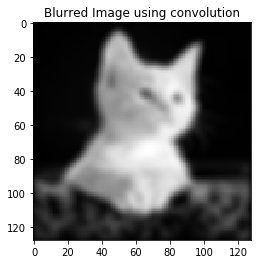

In [176]:
# STEP 3: compute the convolution
from scipy.signal import convolve2d
conv_cat=convolve2d(img, Gkernal, mode='same', boundary='fill', fillvalue=0)
plt.figure()
plt.imshow(conv_cat,cmap='gray')
plt.title('Blurred Image using convolution')

Text(0.5, 1.0, 'Blurred Image using fft')

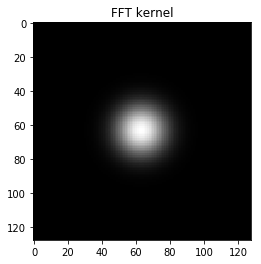

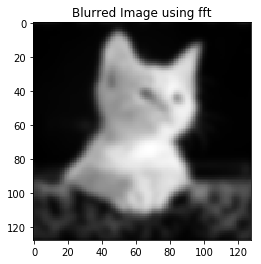

In [177]:
# STEP 4: find the fourier filter
# fft of original image
imgfft=np.fft.fft2(img)
ftshift=np.fft.fftshift(imgfft)
# make a kernel in fourier domain
x=np.zeros((128, 128))
x[63, 63] = 1
fftkernel = ndi.filters.gaussian_filter(x, sigma=10)
plt.figure()
plt.imshow(fftkernel, interpolation='none',cmap='gray')   #gaussian kernel
plt.title('FFT kernel')
# multiply them in Fourier domain 
cat_fft=ftshift*fftkernel;
# inverse fourier to recovery image
f_ishift = np.fft.ifftshift(cat_fft)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.figure()
plt.imshow(img_back, interpolation='none',cmap='gray')
plt.title('Blurred Image using fft')

# Question 3：Data augmentation

(256, 256, 3)


Text(0.5, 1.0, 'Shelly Original')

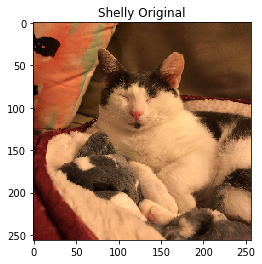

In [181]:
import numpy as np
import matplotlib.pyplot as plt
shelly = plt.imread('C:/Users/limuc/Documents/Classes/2019Spring/shelly.jpg')
shelly = resize(shelly, [256, 256])
print(shelly.shape)
plt.imshow(shelly)
plt.title('Shelly Original')

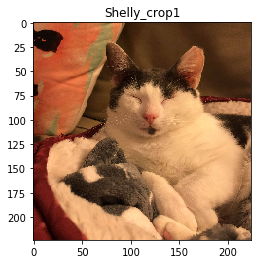

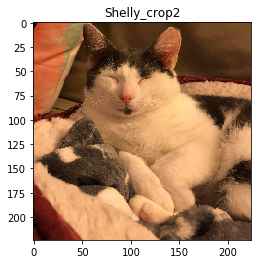

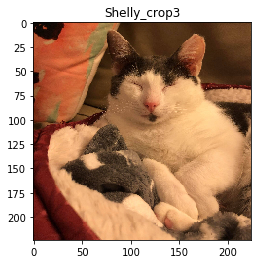

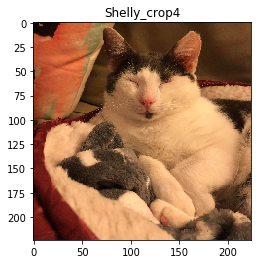

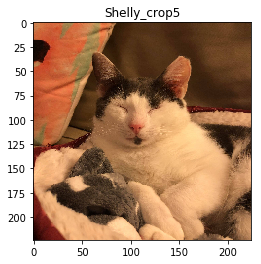

In [182]:
cropheight=256-224;
cropwidth=256-224;
# select five intergers 
x0=np.random.randint(0,cropwidth,5)
y0=np.random.randint(0,cropheight,5)
# crop from a left upper corner point
for i in range(5):
    shelly_crop=shelly[x0[i]:x0[i]+224, y0[i]:y0[i]+224,:]
    plt.figure()
    plt.imshow(shelly_crop)
    plt.title('Shelly_crop'+ str(i+1))